# Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car

# Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Step 1 : Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import all libraries and dependencies for dataframe and data visualisation
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Loading Datasets

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('CarPrice_Assignment.csv')

# Display the first few rows of the DataFrame
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Understanding the dataframe

In [4]:
#shape of the data
df.shape

(205, 26)

In [5]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Generate descriptive statistics for the DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


# Step 2 : Cleaning the Data
We need to do some basic cleansing activity in order to feed our model the correct data.

In [7]:
# droppig car_id as car_id are continuous
df = df.drop('car_ID',axis=1)

In [8]:
# calculating the missing values % contribution in df

df_null = df.isna().mean().round(2)*100
df_null.sort_values().head()

symboling           0.0
citympg             0.0
peakrpm             0.0
horsepower          0.0
compressionratio    0.0
dtype: float64

In [9]:
# Datatypes
df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

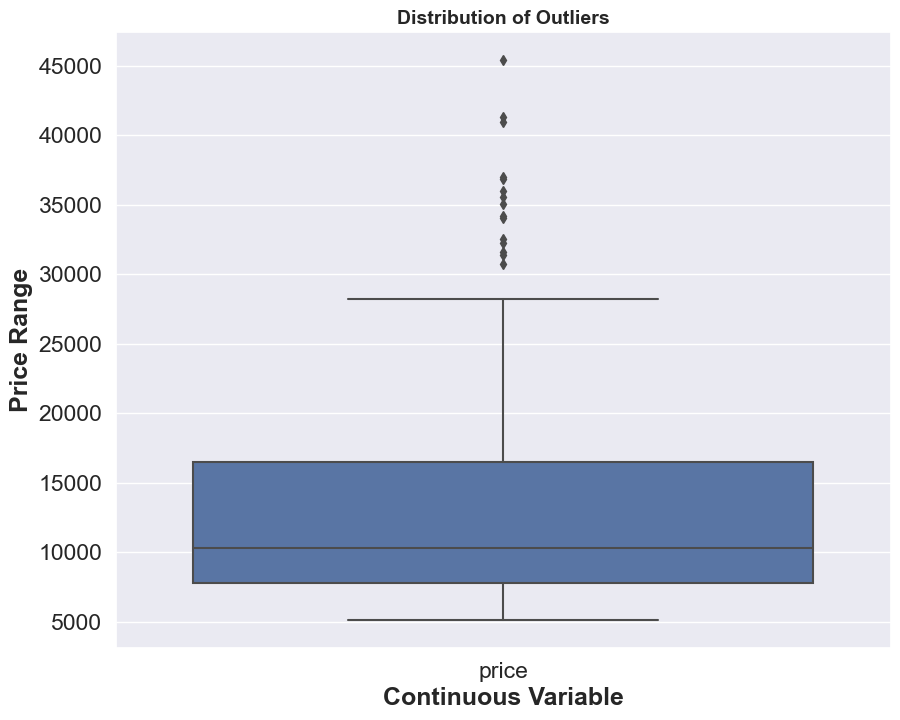

(205, 25)


In [10]:
# Outlier Analysis of price variable with maximum amount of inconsistency

outliers = ['price']
plt.figure(figsize=(10,8))
sns.boxplot(data=df[outliers])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

### Insights:
- There are some price ranges above 36000 which can be termed as outliers but lets not remove it rather we will use standarization scaling.

In [11]:
# Extracting Car Company from the CarName as per direction in Problem 

Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)
df.drop(columns=["CarName"],inplace=True)

In [12]:
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
df["CompanyName"].nunique()

28

In [14]:
# Unique Car Company
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Typo Error in Car Company name
- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen = vw

In [15]:
# Renaming the typo errors in Car Company names
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [16]:
df["CompanyName"].nunique()

23

In [17]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

df['symboling'] = df['symboling'].astype(str)

In [19]:
# checking for duplicates

df.loc[df.duplicated()]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [20]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

## Step 3: Visualising the Data

- Here we will identify if some predictors directly have a strong association with the outcome variable **price**

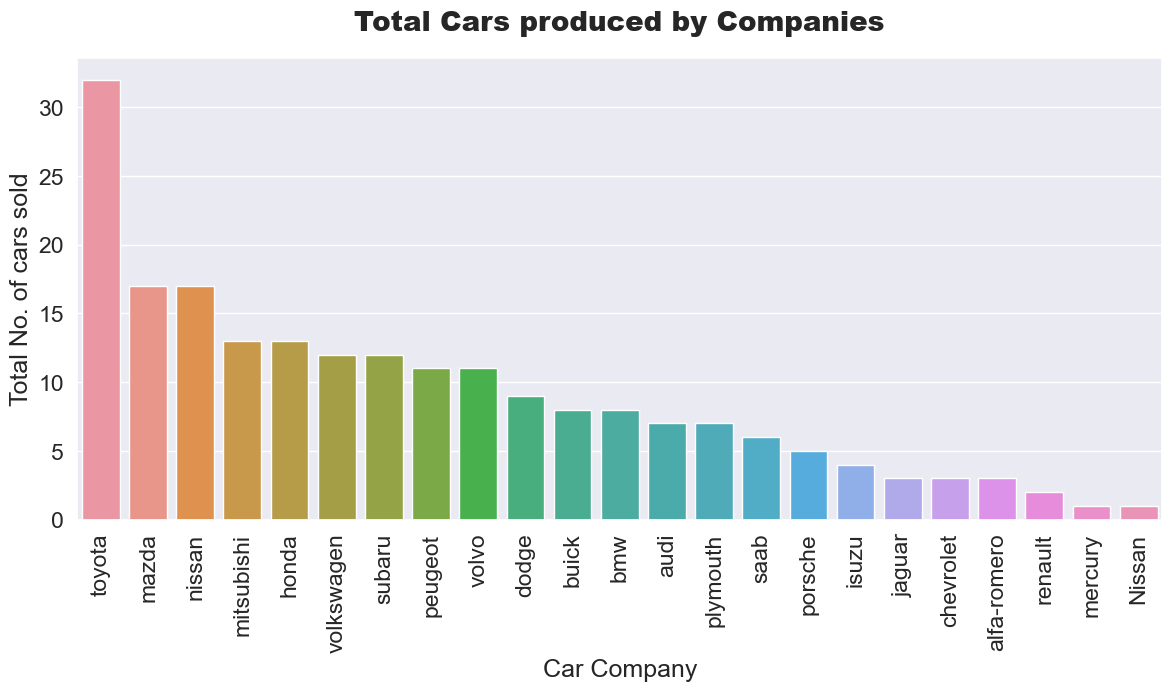

In [21]:
plt.figure(figsize=(14,6))
counts = df["CompanyName"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

#### Insights:
- Toyota seems to be the most favoured cars.
- Mercury seems to be the least favoured cars.

### Visualizing the distribution of car prices

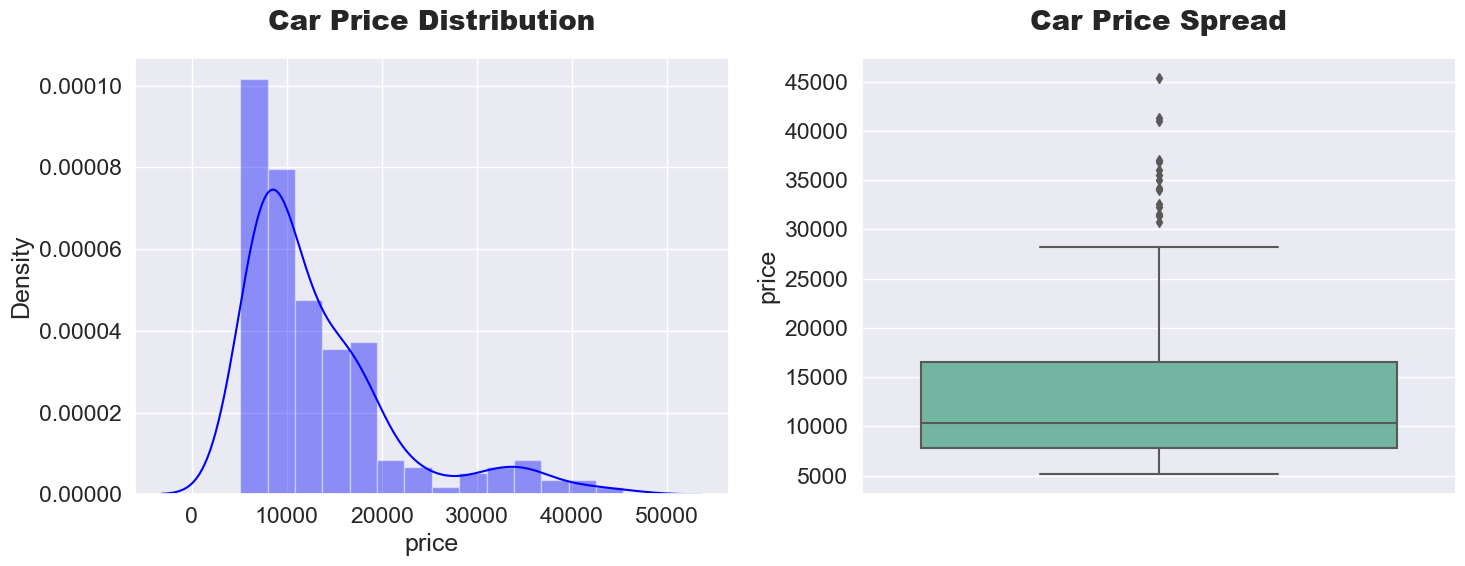

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="blue",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

- The plots seems to be right skewed, the prices of almost all cars looks like less than 18000.

#### Visualising Numeric Variables

Pairplot of all the numeric variables

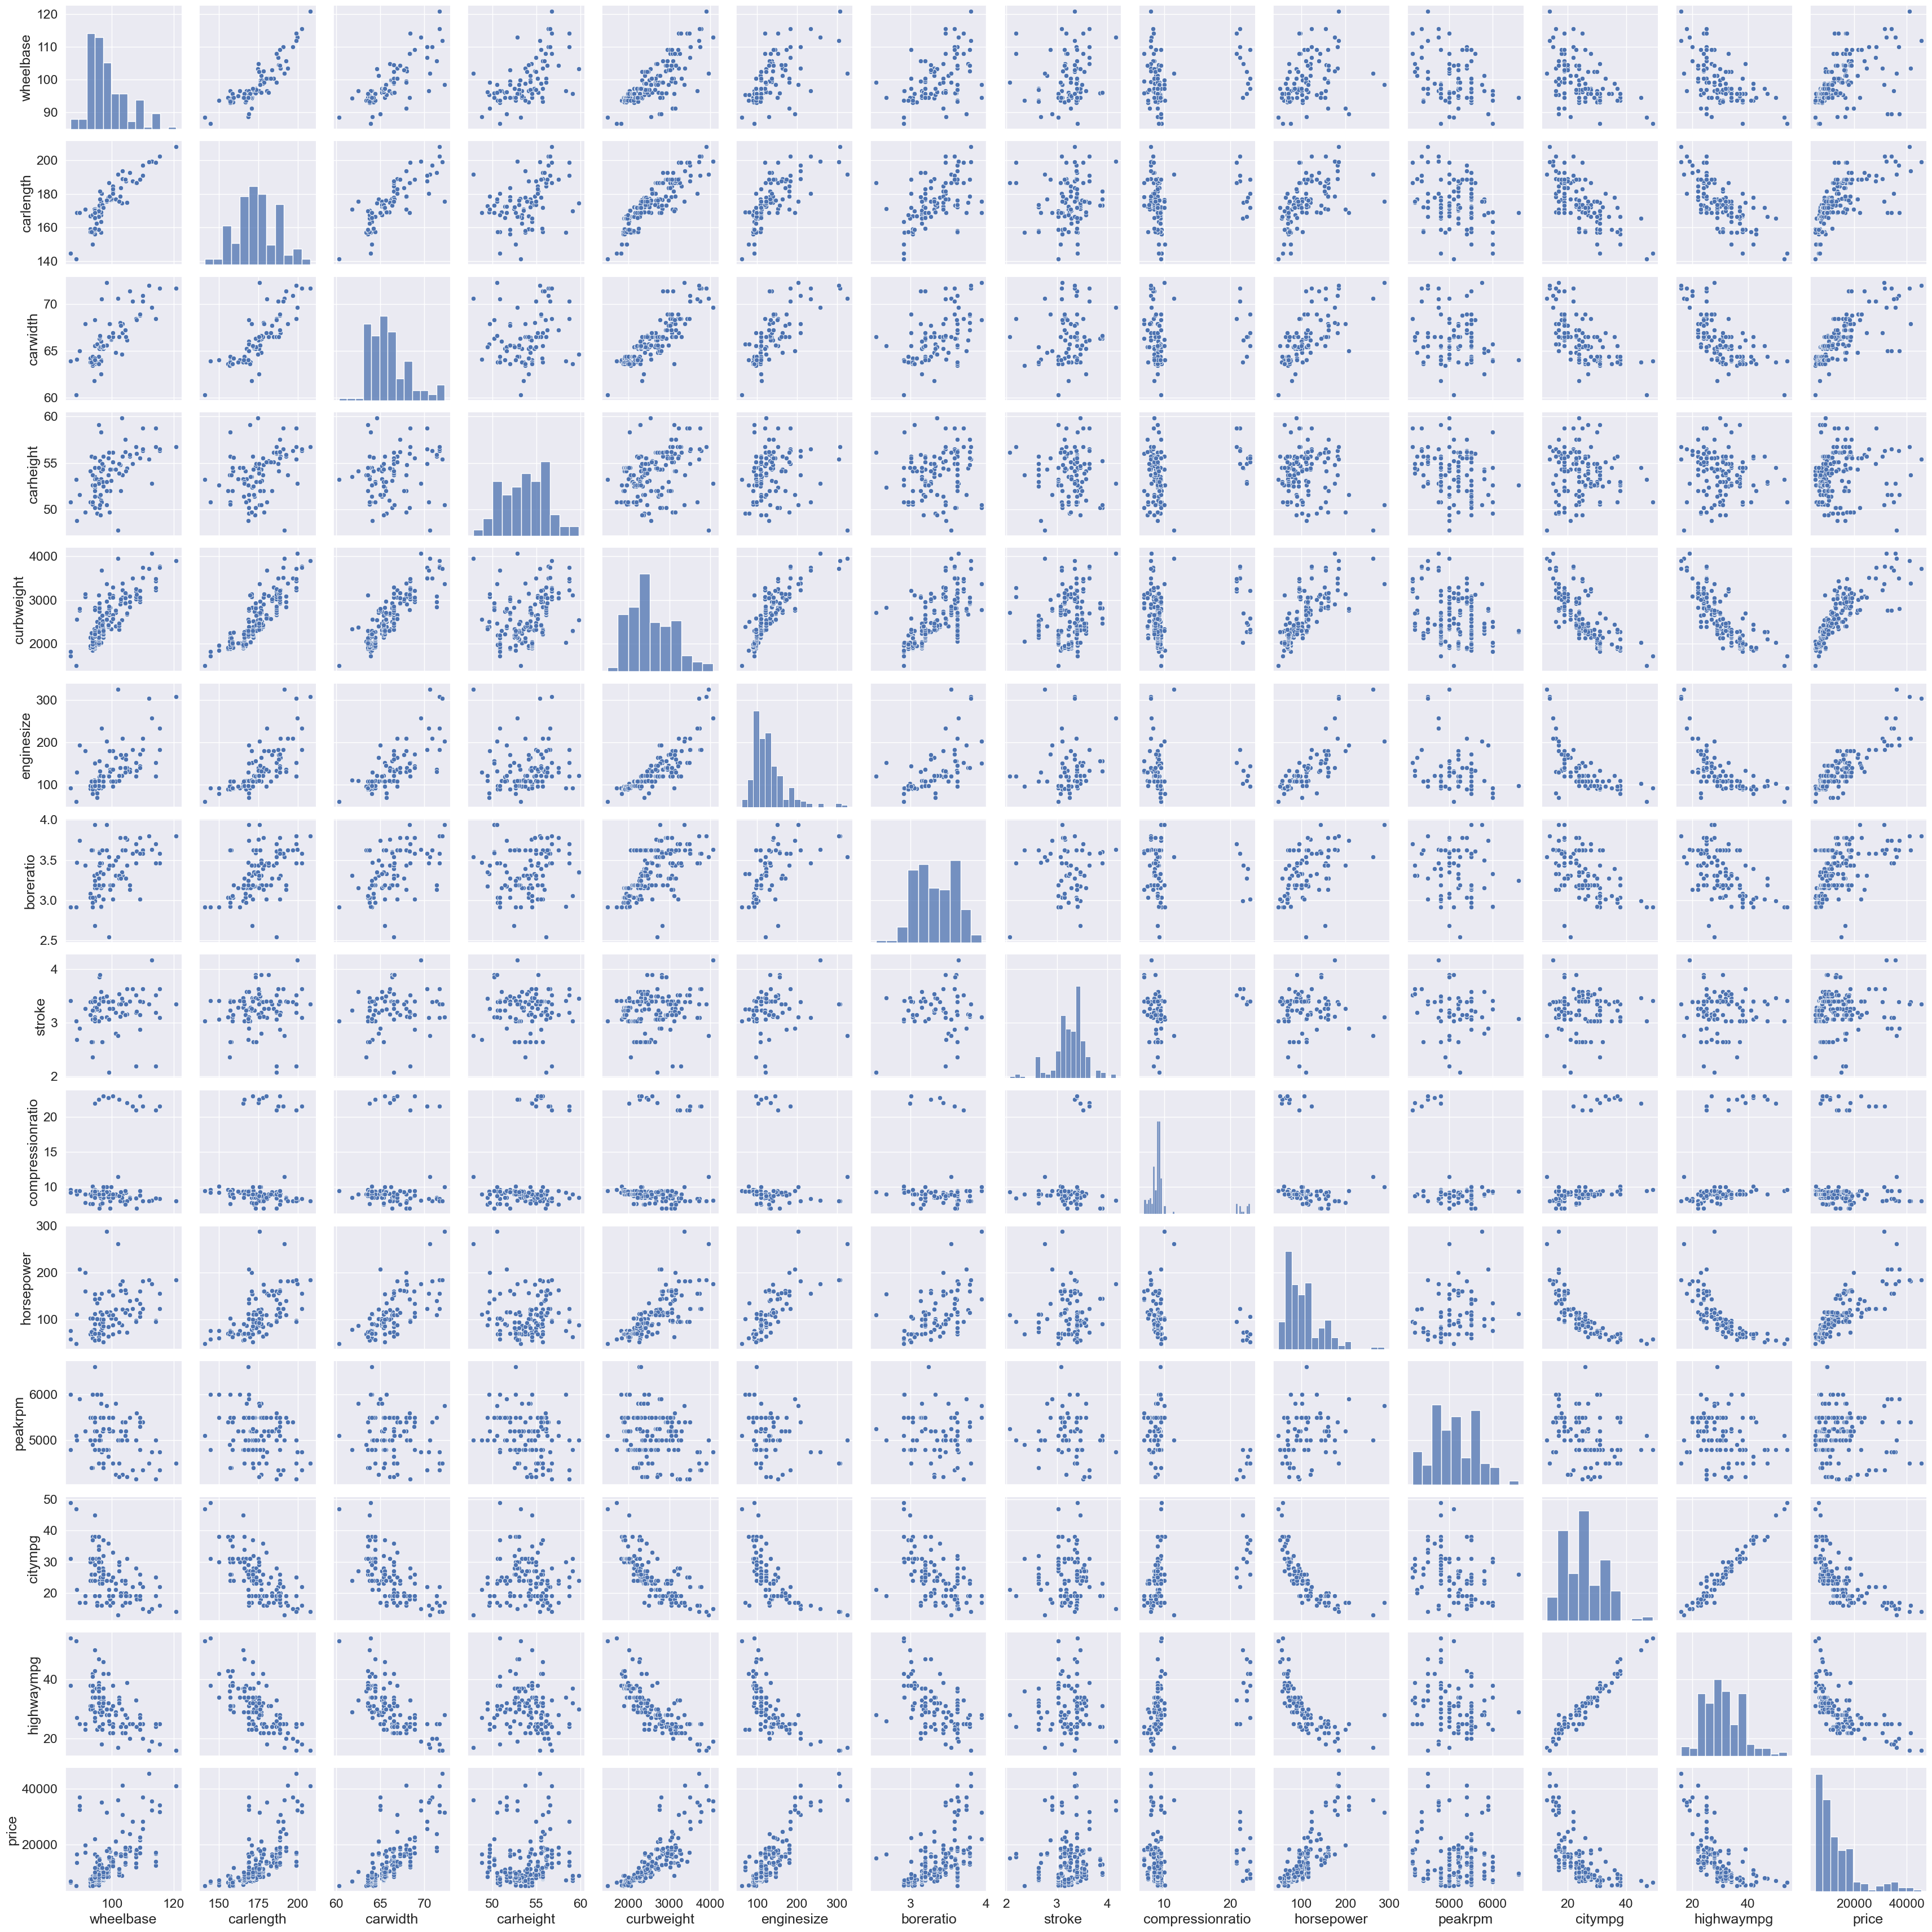

In [23]:
sns.pairplot(df[num_col])

#### Insights:
- `carwidth` , `carlength`, `curbweight` ,`enginesize` ,`horsepower`seems to have a poitive correlation with price.
- `carheight` doesn't show any significant trend with price.
- `citympg` , `highwaympg` - seem to have a significant negative correlation with price.

#### Visualising few more Categorical Variables

Boxplot of all the categorical variables

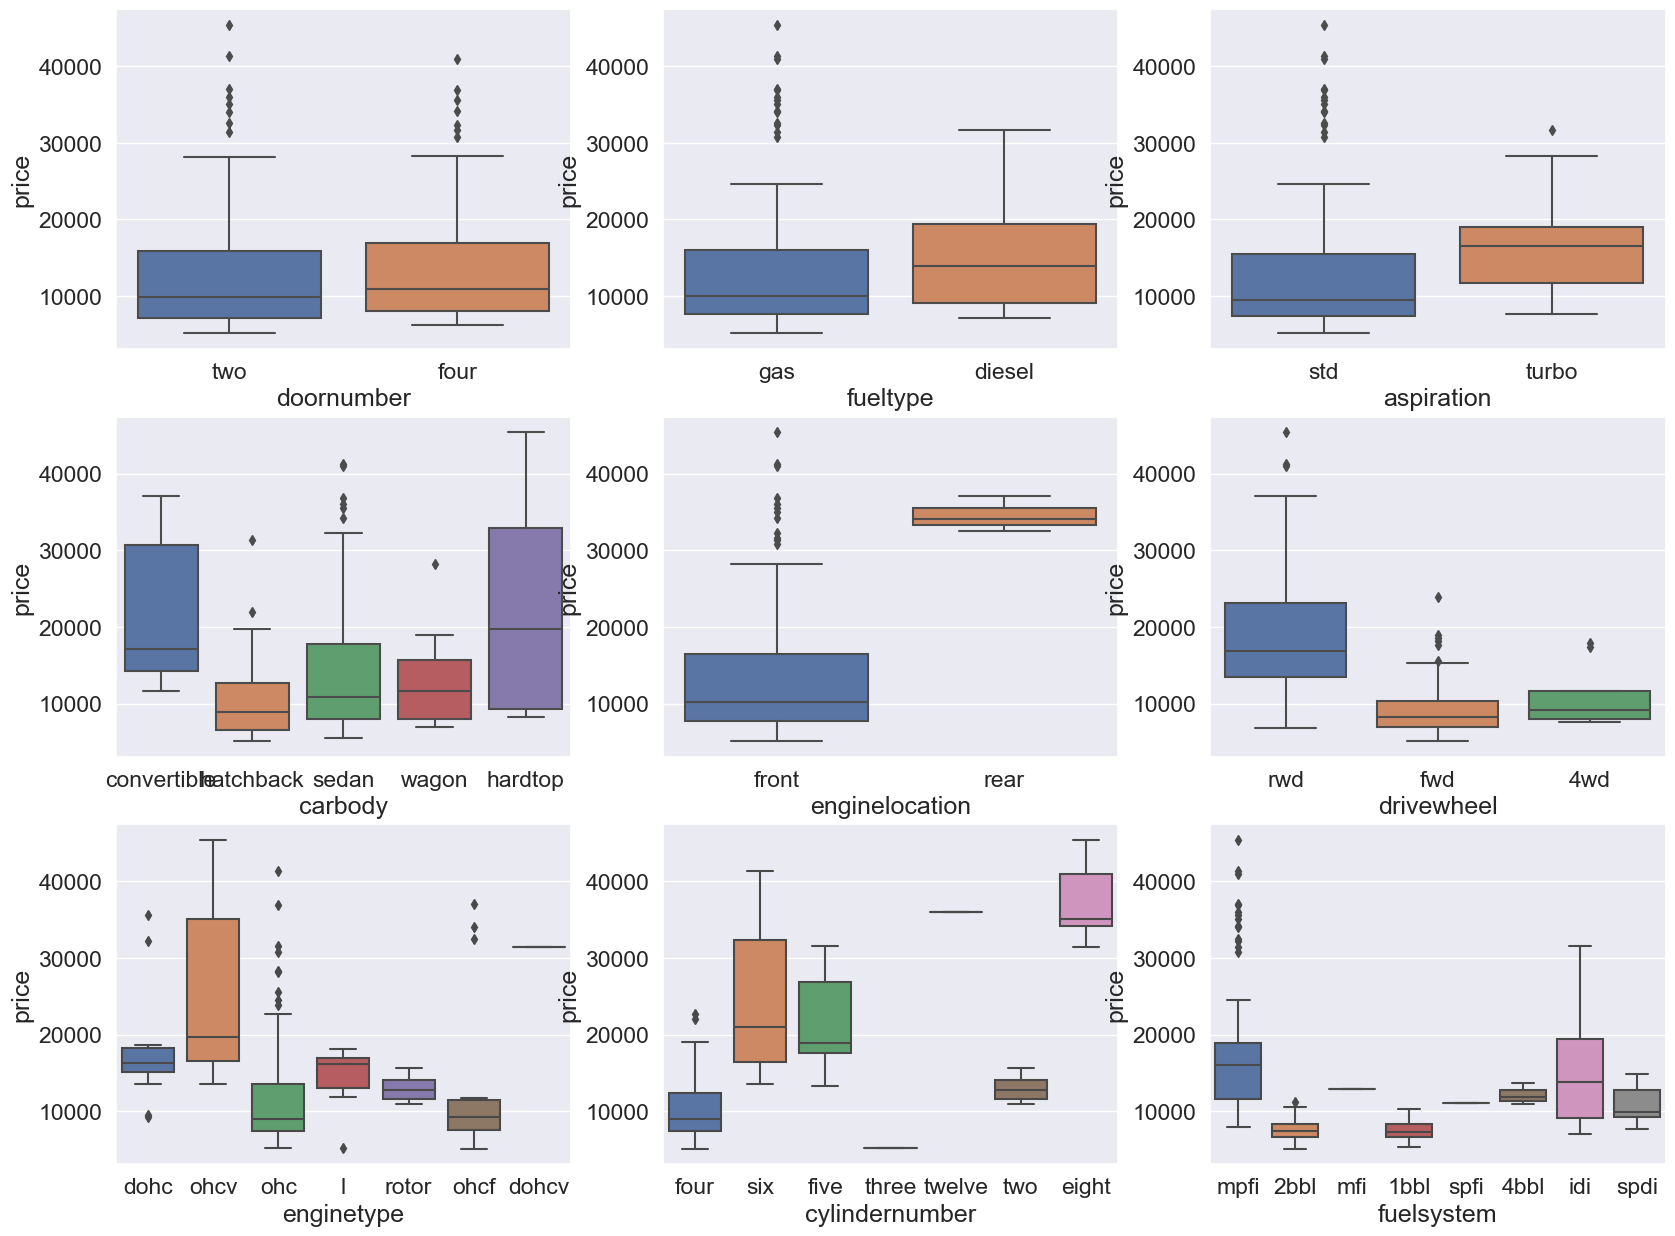

In [24]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

#### Insights
- The cars with `fueltype` as `diesel` are comparatively expensive than the cars with `fueltype` as `gas`.
- All the types of carbody is relatively cheaper as compared to `convertible` carbody.
- The cars with `rear enginelocation` are way expensive than cars with `front enginelocation`.
- The price of car is directly proportional to `no. of cylinders` in most cases.
- Enginetype `ohcv` comes into higher price range cars.
- `DoorNumber` isn't affecting the price much.
- HigerEnd cars seems to have `rwd` drivewheel

Text(0.5, 1.0, 'Car body')

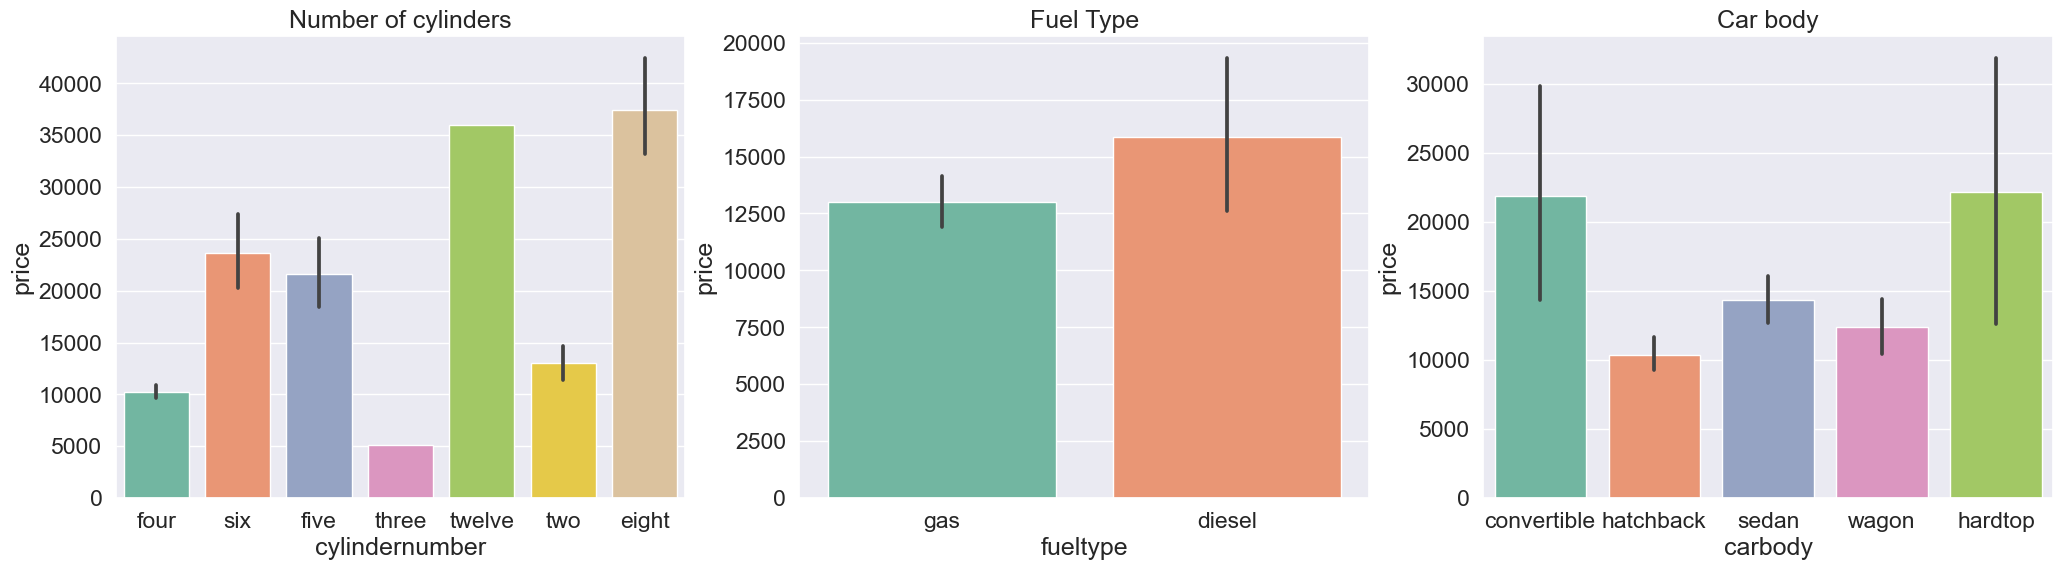

In [25]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
sns.barplot(x='cylindernumber',y="price",data=df,palette="Set2")
plt.title('Number of cylinders')

plt.subplot(1,3,2)
sns.barplot(x='fueltype',y="price",data=df,palette="Set2")
plt.title('Fuel Type')

plt.subplot(1,3,3)
sns.barplot(x='carbody',y="price",data=df,palette="Set2")
plt.title('Car body')


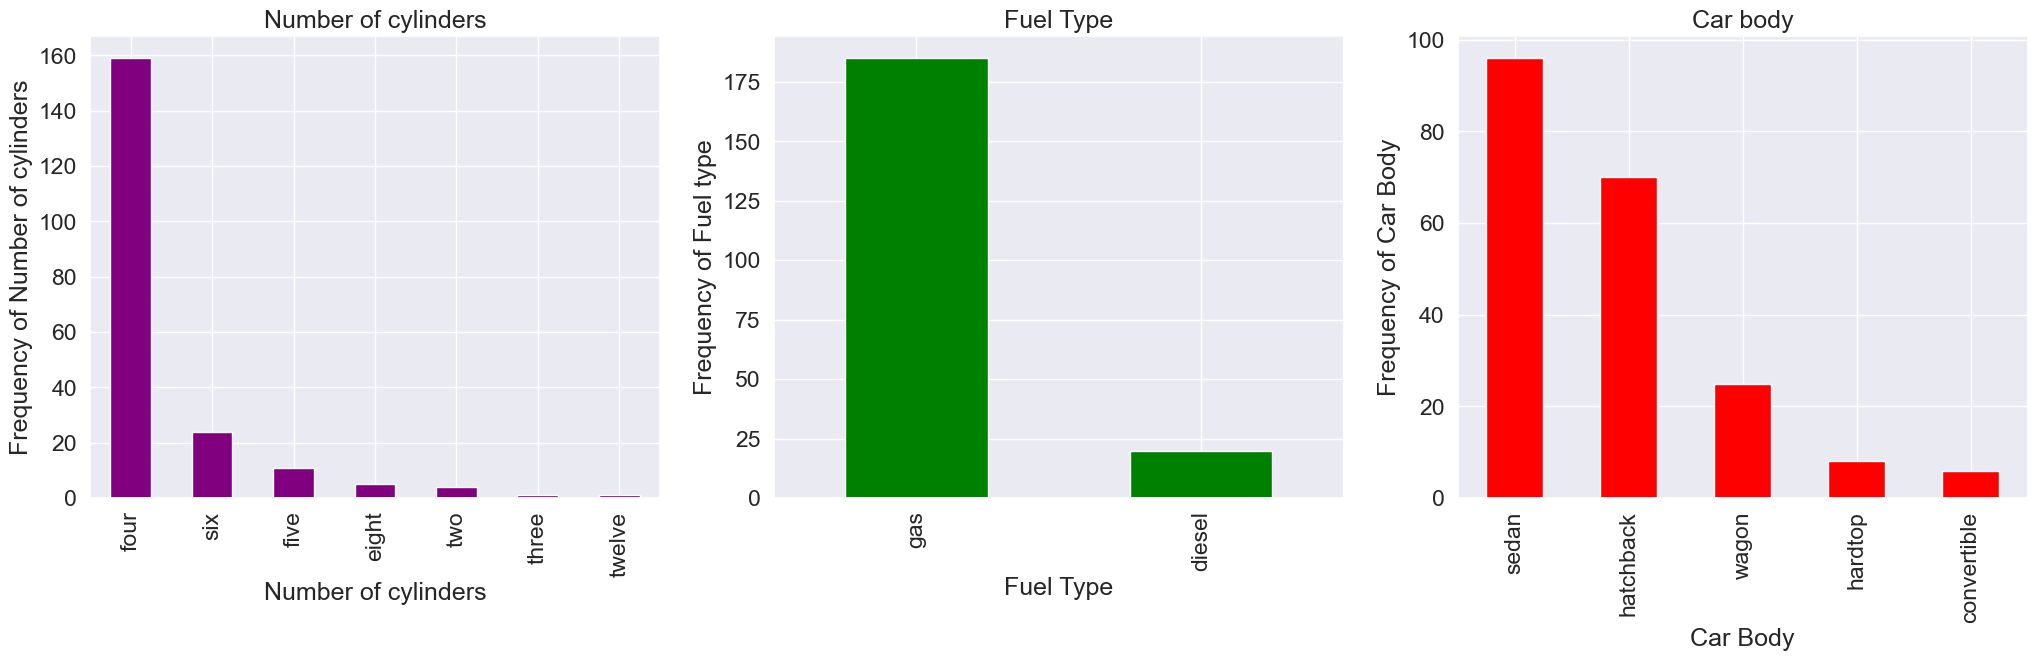

In [26]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
plt1 = df['cylindernumber'].value_counts().plot(kind='bar', color='purple')
plt.title('Number of cylinders')
plt1.set(xlabel='Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1, 3, 2)
plt1 = df['fueltype'].value_counts().plot(kind='bar', color='green')
plt.title('Fuel Type')
plt1.set(xlabel='Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1, 3, 3)
plt1 = df['carbody'].value_counts().plot(kind='bar', color='red')
plt.title('Car body')
plt1.set(xlabel='Car Body', ylabel='Frequency of Car Body')

plt.show()


#### Insights:
- The number of cylinders used in most cars is `four`.
- Number of `Gas` fueled cars are way more than `diesel` fueled cars.
- `Sedan` is the most prefered car type.

#### Relationship between `fuelsystem` vs `price` with hue `fueltype`

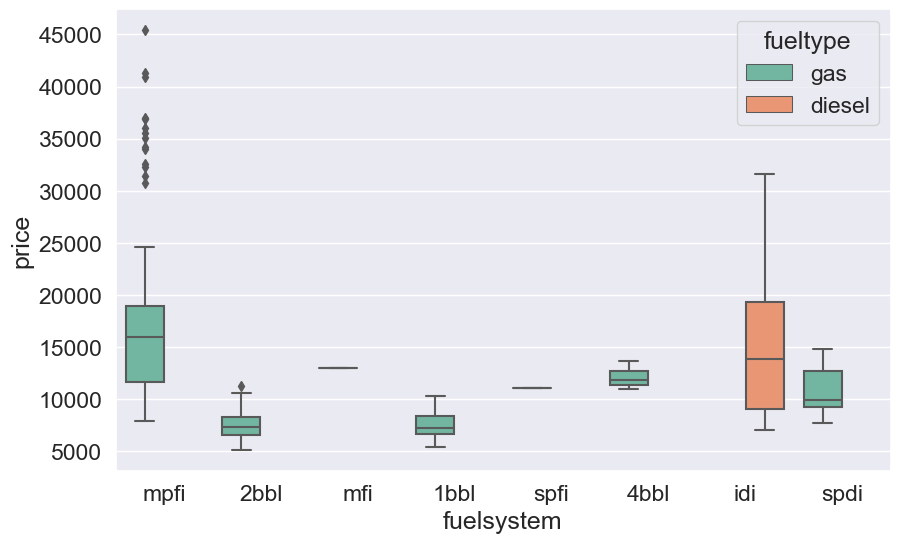

In [27]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df,palette="Set2")
plt.show()

#### Relationship between `carbody` vs `price` with hue `enginelocation`

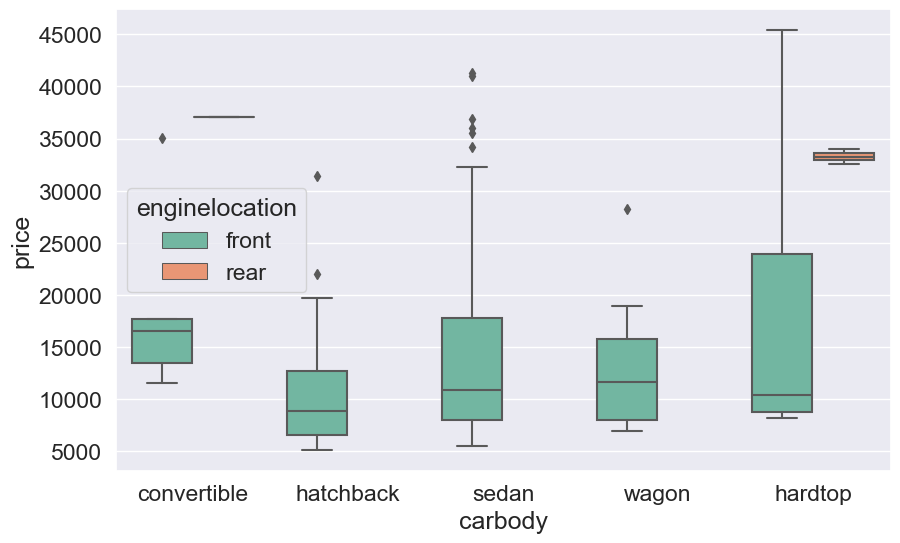

In [28]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df,palette="Set2")
plt.show()

#### Relationship between `cylindernumber` vs `price` with hue `fueltype`

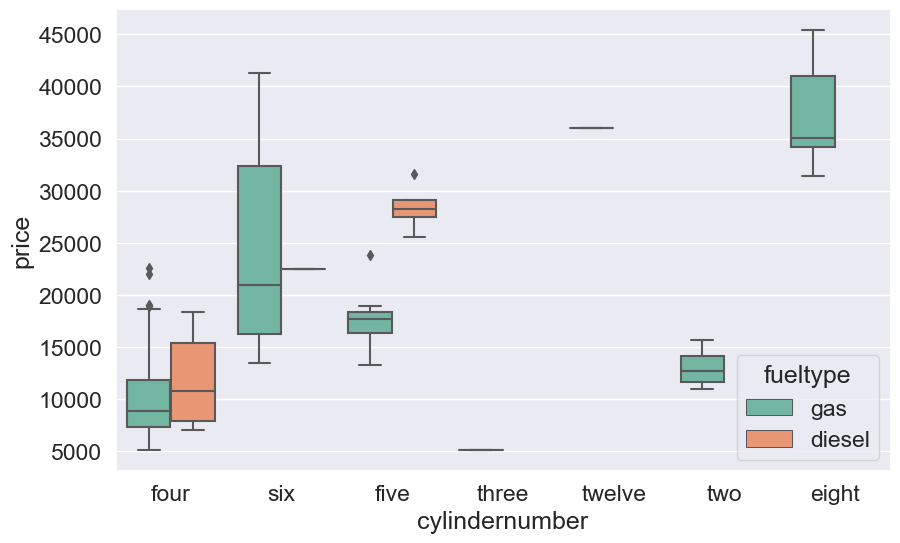

In [29]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df,palette='Set2')
plt.show()

#### Derived Metrices
- Average Price

<Figure size 2000x600 with 0 Axes>

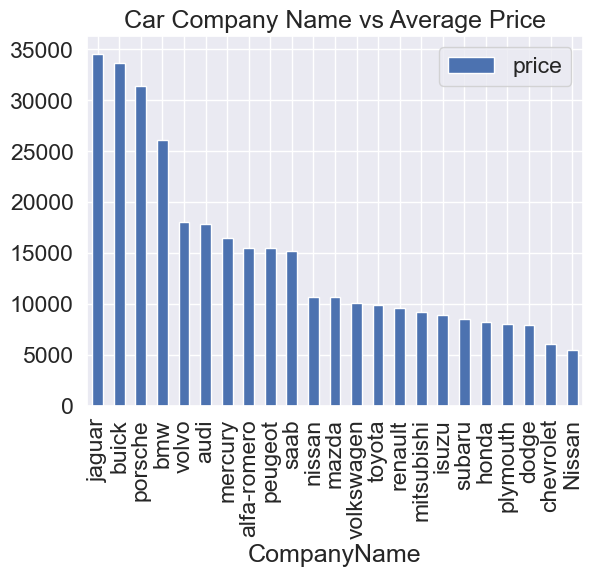

In [30]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

#### Insights:
- `Jaguar`,`Buick` and `porsche` seems to have the highest average price.

<Figure size 2000x600 with 0 Axes>

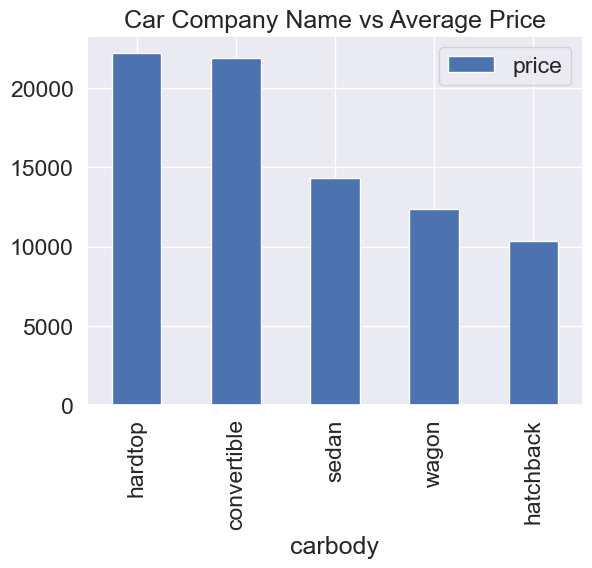

In [31]:
plt.figure(figsize=(20, 6))

df_autoy = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

#### Insights:
- `hardtop` and `convertible` seems to have the highest average price.

In [32]:
#Binning the Car Companies based on avg prices of each car Company.

df['price'] = df['price'].astype('int')
df_temp = df.copy()
t = df_temp.groupby(['CompanyName'])['price'].mean()
df_temp = df_temp.merge(t.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category'] = pd.cut(df_temp['price_y'],bins,right=False,labels=label)
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range


#### Significant variables after Visualization
- Cars_Category , Engine Type, Fuel Type
- Car Body , Aspiration , Cylinder Number 
- Drivewheel , Curbweight , Car Length 
- Car Length , Car width , Engine Size
- Boreratio , Horse Power , Wheel base 
- citympg , highwaympg , symboling

In [33]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

In [34]:
df = df[sig_col]

## Step 4: Data Preparation

### Dummy Variables

The variable `carbody` has five levels. We need to convert these levels into integer. Similarly we need to convert the categorical variables to numeric.

For this, we will use something called `dummy variables`.

In [35]:
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [36]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df[sig_cat_col])
dummies.shape

(205, 29)

In [37]:
dummies = pd.get_dummies(df[sig_cat_col], drop_first = True)
dummies.shape

(205, 22)

In [38]:
# Add the results to the original dataframe

df = pd.concat([df, dummies], axis = 1)

In [39]:
# Drop the original cat variables as dummies are already created

df.drop( sig_cat_col, axis = 1, inplace = True)
df.shape

(205, 32)

## Step 5: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [40]:
df

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,88.6,2548,130,3.47,111,21,27,168.8,64.1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500,88.6,2548,130,3.47,111,21,27,168.8,64.1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500,94.5,2823,152,2.68,154,19,26,171.2,65.5,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13950,99.8,2337,109,3.19,102,24,30,176.6,66.2,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450,99.4,2824,136,3.19,115,18,22,176.6,66.4,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,15250,99.8,2507,136,3.19,110,19,25,177.3,66.3,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
6,17710,105.8,2844,136,3.19,110,19,25,192.7,71.4,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
7,18920,105.8,2954,136,3.19,110,19,25,192.7,71.4,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
8,23875,105.8,3086,131,3.13,140,17,20,192.7,71.4,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
9,17859,99.5,3053,131,3.13,160,16,22,178.2,67.9,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [41]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,7609,93.7,2191,98,2.97,68,31,38,167.3,63.8,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,22018,94.5,2778,151,3.94,143,19,27,168.9,68.3,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,9538,94.5,2300,98,3.24,112,26,29,168.7,64.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500,88.6,2548,130,3.47,111,21,27,168.8,64.1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,18950,104.3,3157,130,3.62,162,17,22,188.8,67.2,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [43]:
scaler = preprocessing.StandardScaler()

In [44]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

In [45]:
# Apply scaler() to all the columns except the 'dummy' variables

df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [46]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,-0.700200,-0.811836,-0.642128,-0.660242,-1.297329,-0.872898,0.839773,1.025419,-0.487238,-0.924500,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,1.151931,-0.677177,0.439415,0.637806,2.432256,1.021826,-0.957048,-0.557490,-0.359789,1.114978,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,-0.452246,-0.677177,-0.441296,-0.660242,-0.259197,0.238673,0.091098,-0.269688,-0.375720,-0.833856,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.442648,-1.670284,0.015642,0.123485,0.625138,0.213410,-0.657578,-0.557490,-0.367754,-0.788535,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,0.757571,0.972390,1.137720,0.123485,1.201877,1.501822,-1.256518,-1.276993,1.225364,0.616439,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


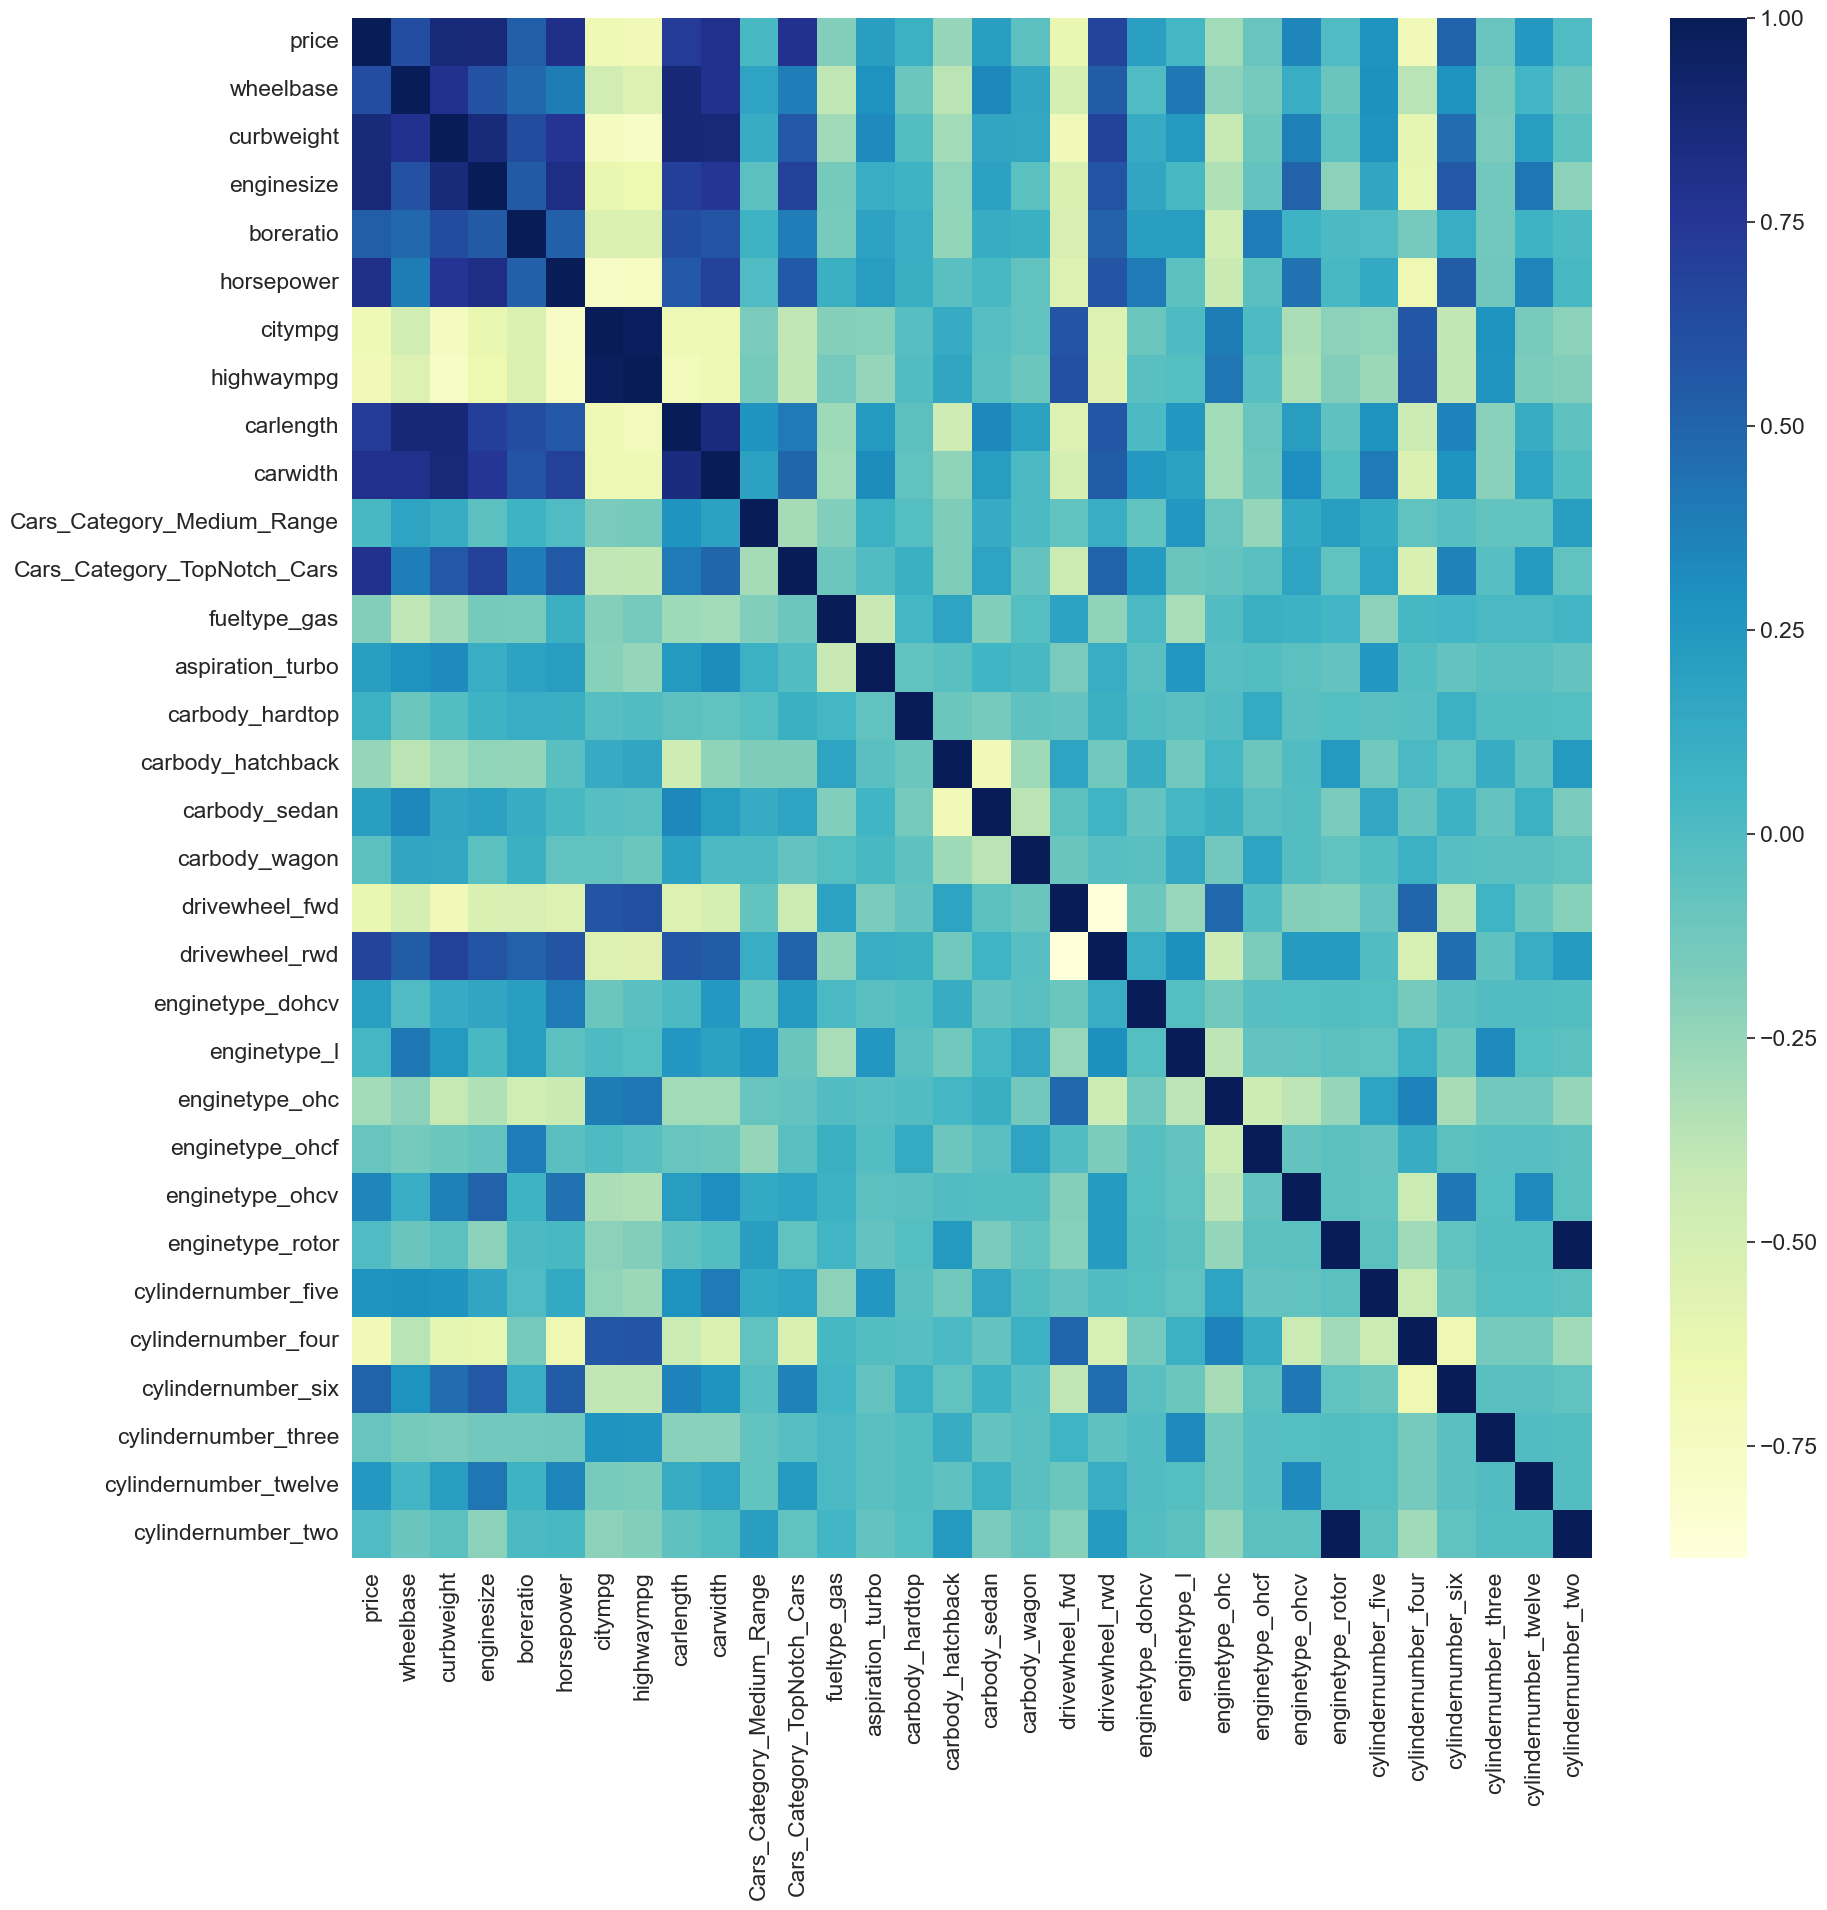

In [47]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="YlGnBu")
plt.show()

Let's see scatterplot for few correlated variables  vs `price`.

In [48]:
col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']

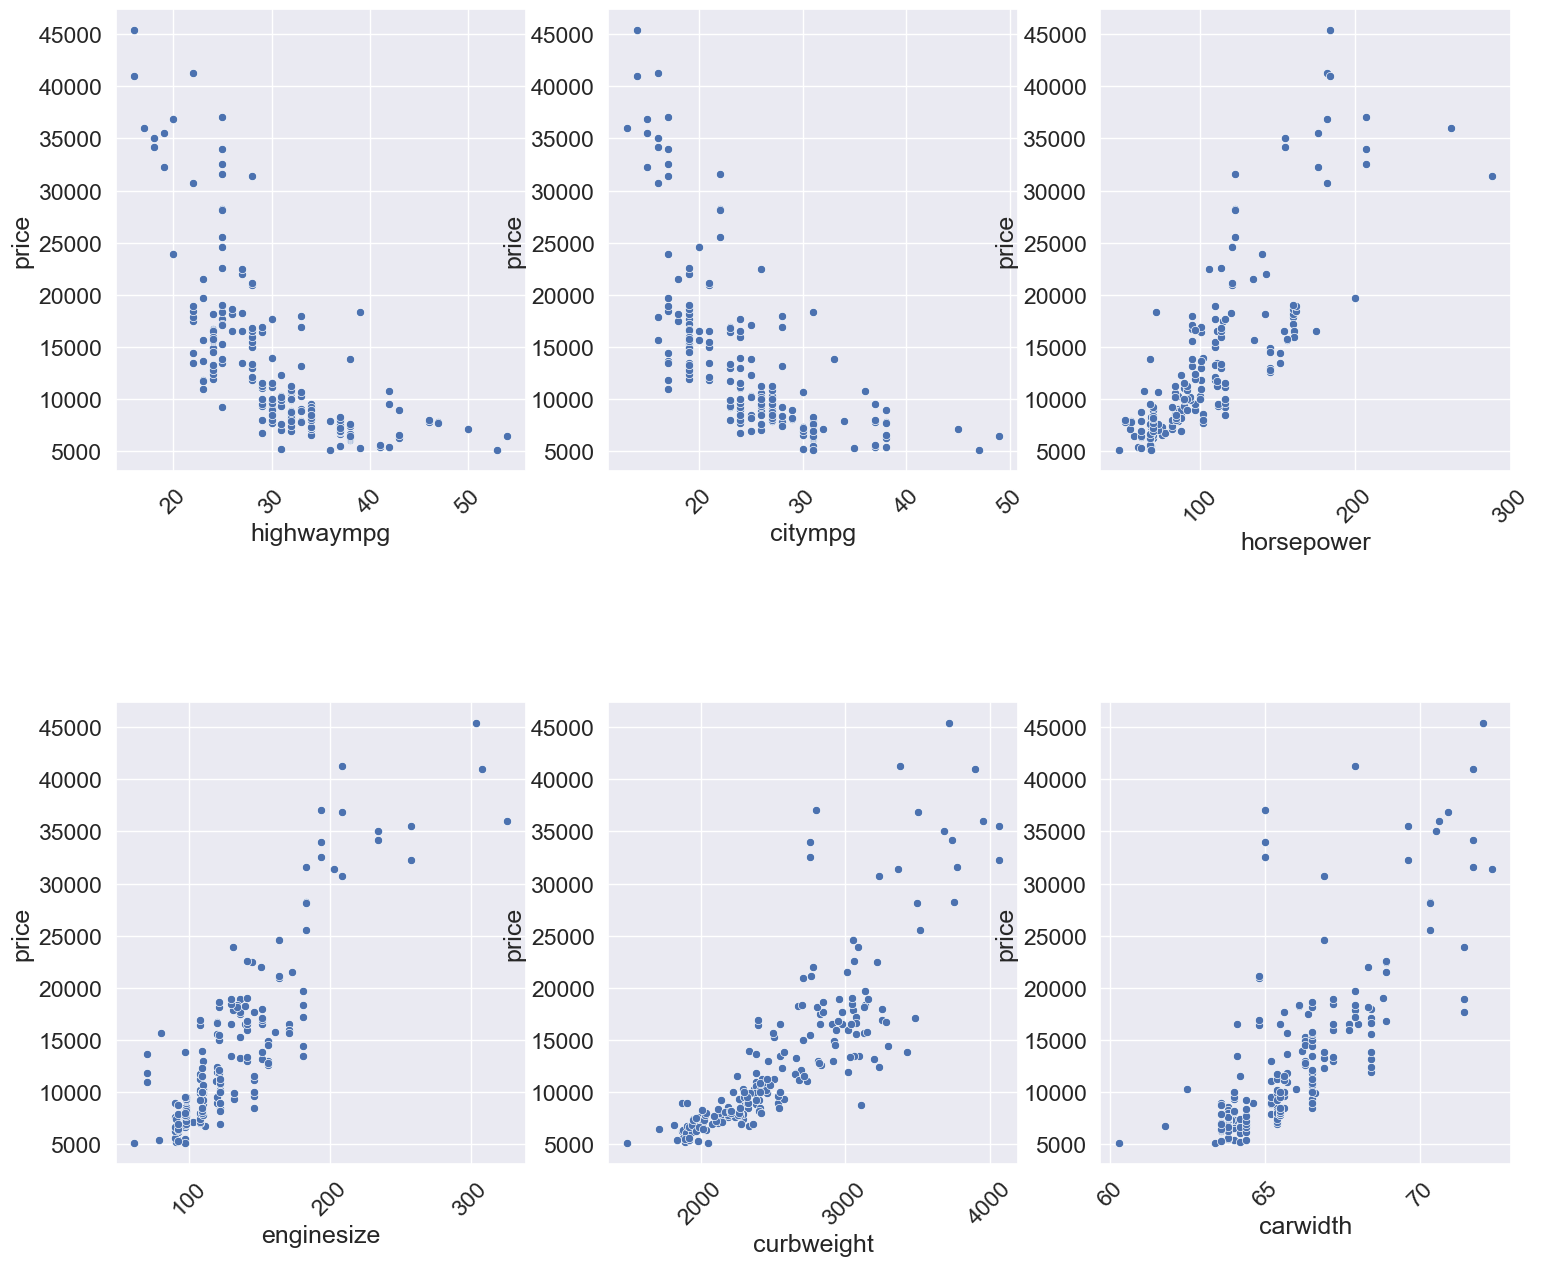

In [49]:
# Scatter Plot of independent variables vs dependent variables

fig,axes = plt.subplots(2,3,figsize=(18,15))
for i, var in enumerate(col):
    # Calculate the row and column index for the current subplot
    row, col = i // 3, i % 3
    # Create a scatter plot of the current independent variable against the dependent variable ('price')
    sns.scatterplot(x=var, y='price', data=df, ax=axes[row, col])
    # Rotate the x-axis tick labels for better readability
    plt.setp(axes[row, col].get_xticklabels(), rotation=45)

# Adjust the vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the scatter plots
plt.show()

- We can see there is a line we can fit in above plots

### Dividing into X and Y sets for the model building

In [50]:
y_train = df_train.pop('price')
X_train = df_train

## Step 6: Building a Linear Model

In [51]:
X_train_1 = X_train['horsepower']

In [52]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [53]:
# Check parameters created

lr_1.params

const         8.673617e-17
horsepower    8.061819e-01
dtype: float64

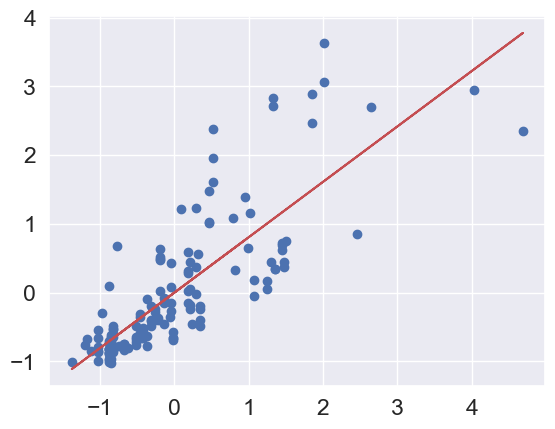

In [54]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [60]:
# Print a summary of the linear regression model obtained
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           6.05e-34
Time:                        21:43:04   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.674e-17      0.050   1.74e-15      1.000      -0.099       0.099
horsepower     0.8062      0.050     16.179      0.000       0.708       0.905
==============================================================================
Omnibus:                       33.630   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.578
Skew:                           1.166   Prob(JB):                     2.32e-12
Kurtosis:                       4.886   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding another variable

The R-squared value obtained is `0.65`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. `curbweight`.

In [56]:
X_train_2 = X_train[['horsepower', 'curbweight']]

In [57]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [58]:
lr_2.params

const         8.673617e-17
horsepower    3.580598e-01
curbweight    5.898214e-01
dtype: float64

In [59]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           3.34e-49
Time:                        21:42:29   Log-Likelihood:                -88.896
No. Observations:                 143   AIC:                             183.8
Df Residuals:                     140   BIC:                             192.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.674e-17      0.038   2.28e-15      1.000      -0.075       0.075
horsepower     0.3581      0.059      6.114      0.000       0.242       0.474
curbweight     0.5898      0.059     10.071      0.000       0.474       0.706
==============================================================================
Omnibus:                       31.547   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.026
Skew:                           0.921   Prob(JB):                     6.22e-16
Kurtosis:                       5.891   Cond. No.                         2.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The R-squared incresed from 0.650 to 0.797 

### Adding another variable

The R-squared value obtained is `0.797`. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. `enginesize`.

In [61]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]

In [62]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [63]:
lr_3.params

const         9.020562e-17
horsepower    2.288470e-01
curbweight    3.938203e-01
enginesize    3.400426e-01
dtype: float64

In [64]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           2.16e-51
Time:                        21:44:14   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.021e-17      0.036    2.5e-15      1.000      -0.071       0.071
horsepower     0.2288      0.064      3.589      0.000       0.103       0.355
curbweight     0.3938      0.073      5.385      0.000       0.249       0.538
enginesize     0.3400      0.083      4.114      0.000       0.177       0.503
==============================================================================
Omnibus:                       25.598   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.392
Skew:                           0.751   Prob(JB):                     9.37e-13
Kurtosis:                       5.653   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We have achieved a R-squared of `0.819` by manually picking the highly correlated variables.
- Now lets use RFE to select the independent variables which accurately predicts the dependent variable `price`.

### RFE
Let's use Recursive feature elimination since we have too many independent variables

In [66]:
# Running RFE with the output number of the variable equal to 15
# Create an instance of the Linear Regression model
lm = LinearRegression()

# Fit the model to the training data
lm.fit(X_train, y_train)

# Create an instance of RFE (Recursive Feature Elimination) with the desired number of output variables (15)
rfe = RFE(estimator=lm, n_features_to_select=15)

# Perform RFE on the training data
rfe = rfe.fit(X_train, y_train)

In [67]:
# Create a list of tuples containing the column names, support, and ranking
feature_ranks = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Print the list
for feature in feature_ranks:
    print(feature)


('wheelbase', False, 5)
('curbweight', True, 1)
('enginesize', False, 11)
('boreratio', False, 8)
('horsepower', True, 1)
('citympg', False, 17)
('highwaympg', False, 4)
('carlength', False, 12)
('carwidth', True, 1)
('Cars_Category_Medium_Range', False, 3)
('Cars_Category_TopNotch_Cars', True, 1)
('fueltype_gas', False, 9)
('aspiration_turbo', False, 15)
('carbody_hardtop', True, 1)
('carbody_hatchback', True, 1)
('carbody_sedan', True, 1)
('carbody_wagon', True, 1)
('drivewheel_fwd', False, 6)
('drivewheel_rwd', False, 10)
('enginetype_dohcv', True, 1)
('enginetype_l', False, 13)
('enginetype_ohc', True, 1)
('enginetype_ohcf', False, 2)
('enginetype_ohcv', True, 1)
('enginetype_rotor', False, 14)
('cylindernumber_five', True, 1)
('cylindernumber_four', True, 1)
('cylindernumber_six', True, 1)
('cylindernumber_three', False, 7)
('cylindernumber_twelve', True, 1)
('cylindernumber_two', False, 16)


In [68]:
# Select the variables which are in support
col_sup = X_train.columns[rfe.support_]

# Print the selected columns
col_sup


Index(['curbweight', 'horsepower', 'carwidth', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [69]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

In [72]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.2
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           3.41e-68
Time:                        21:50:58   Log-Likelihood:                -6.1473
No. Observations:                 143   AIC:                             44.29
Df Residuals:                     127   BIC:                             91.70
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables)<br>
and we need to drop it

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,15.92
6,carbody_sedan,9.73
0,curbweight,9.06
2,carwidth,6.24
5,carbody_hatchback,6.15
9,enginetype_ohc,5.97
1,horsepower,5.61
13,cylindernumber_six,4.73
7,carbody_wagon,3.48
11,cylindernumber_five,2.82


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

- Dropping `cylindernumber_twelve` beacuse its `p-value` is `0.393` and we want p-value less than 0.05 and hence rebuilding the model

In [74]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop('cylindernumber_twelve', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.3
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           4.16e-69
Time:                        21:53:05   Log-Likelihood:                -6.5600
No. Observations:                 143   AIC:                             43.12
Df Residuals:                     128   BIC:                             87.56
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,15.27
0,curbweight,9.06
6,carbody_sedan,9.05
2,carwidth,6.15
5,carbody_hatchback,5.95
9,enginetype_ohc,5.92
1,horsepower,4.69
13,cylindernumber_six,3.70
7,carbody_wagon,3.31
11,cylindernumber_five,2.66


- Dropping `cylindernumber_six` beacuse its `p-value` is `0.493` and we want p-value less than 0.05 and hence rebuilding the model

In [76]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe2 = X_train_rfe1.drop('cylindernumber_six', 1,)

# Adding a constant variable and Build a third fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.1
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           4.29e-70
Time:                        21:53:39   Log-Likelihood:                -6.8230
No. Observations:                 143   AIC:                             41.65
Df Residuals:                     129   BIC:                             83.13
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,8.99
0,curbweight,8.53
2,carwidth,5.72
9,enginetype_ohc,5.65
6,carbody_sedan,5.24
1,horsepower,4.53
5,carbody_hatchback,3.76
7,carbody_wagon,2.36
3,Cars_Category_TopNotch_Cars,2.13
11,cylindernumber_five,1.97


- Dropping `carbody_hardtop` beacuse its `p-value` is `0.238` and we want p-value less than 0.05 and hence rebuilding the model

In [78]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe3 = X_train_rfe2.drop('carbody_hardtop', 1,)

# Adding a constant variable and Build a fourth fitted model
X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.5
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           6.73e-71
Time:                        21:54:20   Log-Likelihood:                -7.5979
No. Observations:                 143   AIC:                             41.20
Df Residuals:                     130   BIC:                             79.71
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.51
11,cylindernumber_four,8.09
2,carwidth,5.65
8,enginetype_ohc,5.60
5,carbody_sedan,4.64
1,horsepower,4.17
4,carbody_hatchback,3.31
6,carbody_wagon,2.22
3,Cars_Category_TopNotch_Cars,2.08
10,cylindernumber_five,1.93


- Dropping `enginetype_ohc` beacuse its `p-value` is `0.110` and we want p-value less than 0.05 and hence rebuilding the model

In [80]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe4 = X_train_rfe3.drop('enginetype_ohc', 1,)

# Adding a constant variable and Build a fifth fitted model
X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     167.4
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           1.81e-71
Time:                        21:54:51   Log-Likelihood:                -9.0049
No. Observations:                 143   AIC:                             42.01
Df Residuals:                     131   BIC:                             77.56
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.25
10,cylindernumber_four,6.80
2,carwidth,5.65
5,carbody_sedan,4.33
1,horsepower,4.17
4,carbody_hatchback,3.10
6,carbody_wagon,2.20
3,Cars_Category_TopNotch_Cars,1.83
9,cylindernumber_five,1.63
7,enginetype_dohcv,1.57


- Dropping `cylindernumber_five` beacuse its `p-value` is `0.104` and we want p-value less than 0.05 and hence rebuilding the model

In [82]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe5 = X_train_rfe4.drop('cylindernumber_five', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           4.91e-72
Time:                        21:55:27   Log-Likelihood:                -10.457
No. Observations:                 143   AIC:                             42.91
Df Residuals:                     132   BIC:                             75.51
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.10
9,cylindernumber_four,5.76
2,carwidth,5.08
1,horsepower,4.13
5,carbody_sedan,3.52
4,carbody_hatchback,2.63
6,carbody_wagon,1.94
3,Cars_Category_TopNotch_Cars,1.83
7,enginetype_dohcv,1.54
8,enginetype_ohcv,1.43


- Dropping `enginetype_ohcv` beacuse its `p-value` is `0.180` and we want p-value less than 0.05 and hence rebuilding the model

In [84]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe6 = X_train_rfe5.drop('enginetype_ohcv', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           8.26e-73
Time:                        21:55:55   Log-Likelihood:                -11.434
No. Observations:                 143   AIC:                             42.87
Df Residuals:                     133   BIC:                             72.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.10
8,cylindernumber_four,5.66
2,carwidth,5.08
1,horsepower,3.81
5,carbody_sedan,3.35
4,carbody_hatchback,2.47
6,carbody_wagon,1.89
3,Cars_Category_TopNotch_Cars,1.81
7,enginetype_dohcv,1.49


- Dropping `curbweight` beacuse its `VIF` is `8.1` and we want VIF less than 5 and hence rebuilding the model

In [86]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe7 = X_train_rfe6.drop('curbweight', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           4.86e-71
Time:                        21:56:42   Log-Likelihood:                -18.737
No. Observations:                 143   AIC:                             55.47
Df Residuals:                     134   BIC:                             82.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylindernumber_four,5.66
4,carbody_sedan,3.35
0,horsepower,2.72
3,carbody_hatchback,2.40
1,carwidth,2.22
2,Cars_Category_TopNotch_Cars,1.73
5,carbody_wagon,1.71
6,enginetype_dohcv,1.24


- Dropping `cylindernumber_four` beacuse its `VIF` is `5.66` and we want VIF less than 5 and hence rebuilding the model

In [88]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe8 = X_train_rfe7.drop('cylindernumber_four', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe8c = sm.add_constant(X_train_rfe8)
lm_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()

#Summary of linear model
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           4.70e-70
Time:                        21:57:12   Log-Likelihood:                -24.089
No. Observations:                 143   AIC:                             64.18
Df Residuals:                     135   BIC:                             87.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.45
1,carwidth,2.12
2,Cars_Category_TopNotch_Cars,1.70
4,carbody_sedan,1.22
6,enginetype_dohcv,1.22
3,carbody_hatchback,1.10
5,carbody_wagon,1.02


Lets drop `carbody_sedan` and see if there is any drastic fall in R squared.If not we can drop `carbody sedan`.
Our aim is to explain the maximum variance with minimum variable.

In [90]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe9 = X_train_rfe8.drop('carbody_sedan', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe9c = sm.add_constant(X_train_rfe9)
lm_rfe9 = sm.OLS(y_train, X_train_rfe9c).fit()

#Summary of linear model
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           1.68e-69
Time:                        21:58:41   Log-Likelihood:                -28.398
No. Observations:                 143   AIC:                             70.80
Df Residuals:                     136   BIC:                             91.54
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- The R squared value just dropped by `0.005`.Hence we can proceed with dropping `carbody_sedan`.

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.31
1,carwidth,2.08
2,Cars_Category_TopNotch_Cars,1.46
5,enginetype_dohcv,1.22
3,carbody_hatchback,1.10
4,carbody_wagon,1.02


- Dropping `carbody_wagon` beacuse its `p-value` is `0.315` and we want p-value less than 0.05 and hence rebuilding the model

In [93]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe10 = X_train_rfe9.drop('carbody_wagon', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe10c = sm.add_constant(X_train_rfe10)
lm_rfe10 = sm.OLS(y_train, X_train_rfe10c).fit()

#Summary of linear model
print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           1.57e-70
Time:                        21:59:41   Log-Likelihood:                -28.930
No. Observations:                 143   AIC:                             69.86
Df Residuals:                     137   BIC:                             87.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe10.values, i) for i in range(X_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.28
1,carwidth,2.07
2,Cars_Category_TopNotch_Cars,1.45
4,enginetype_dohcv,1.22
3,carbody_hatchback,1.10


- Now the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using model `lm_rfe10` and `lm_rfe8`.

### Here, we are proposing Business 2 Models which can be used to predict the car prices.

## MODEL I
- With `lm_rfe10` which has basically 5 predictor variables.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [97]:
# Predicting the price of training set.
y_train_price = lm_rfe10.predict(X_train_rfe10c)

Text(0.5, 0, 'Errors')

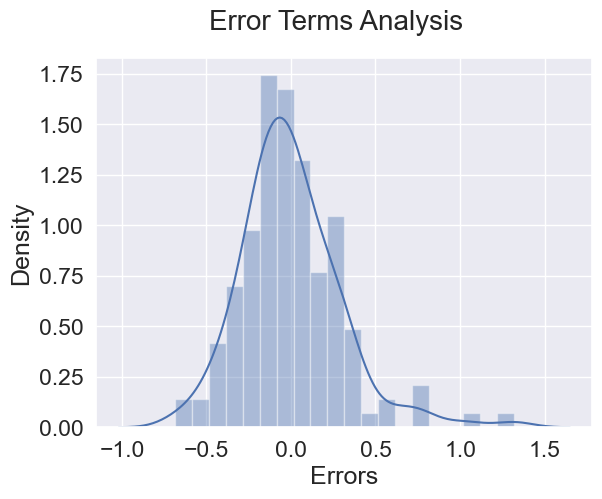

In [98]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [99]:
import warnings
warnings.filterwarnings("ignore")

df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 32)

#### Dividing test set into X_test and y_test

In [100]:
y_test = df_test.pop('price')
X_test = df_test

In [101]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe10c.columns]

In [102]:
# Making predictions using the final model
y_pred = lm_rfe10.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

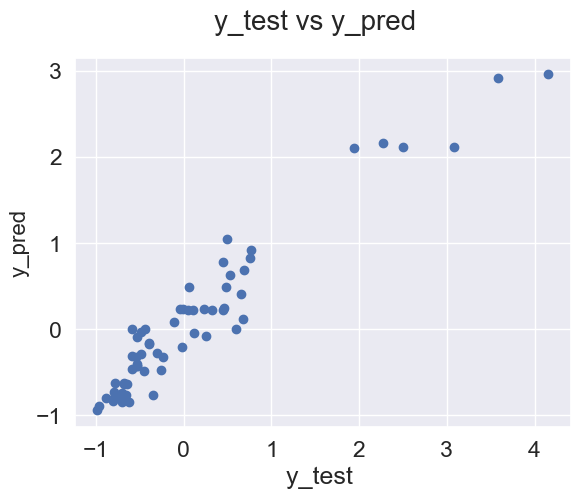

In [104]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

### RMSE Score

In [105]:
r2_score(y_test, y_pred)

0.9094354289897943

###### The R2 score of Training set is 0.912 and Test set is 0.909 which is quite close.
###### Hence, We can say that our model is good enough to predict the Car prices using below predictor variables**
- horsepower
- carwidth	
- Cars_Category_TopNotch_Cars
- carbody_hatchback
- enginetype_dohcv

#### Equation of Line to predict the Car prices values

$ Carprice = -0.0925 +  0.3847  \times  horsepower  + 0.3381  \times  carwidth +  1.3179 \times Carscategorytopnotchcars  - 0.1565 \times carbodyhatchback  - 1.5033 \times enginetypedohcv $

#### Model I Conclusions:
- R-sqaured and Adjusted R-squared - 0.912 and 0.909 - 90% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 284.8 and 1.57e-70(approx. 0.0) - Model fit is significant and explained 90%<br> variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

## MODEL II
- With `lm_rfe8` which has basically 7 predictor variables.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [108]:
# Predicting the price of training set.
y_train_price2 = lm_rfe8.predict(X_train_rfe8c)

Text(0.5, 0, 'Errors')

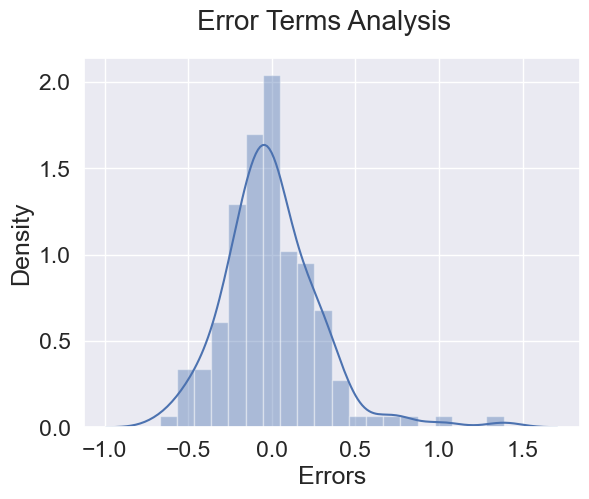

In [109]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price2), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the model.

In [110]:
X_test_2 = X_test_1[X_train_rfe8c.columns]

In [111]:
# Making predictions using the final model
y_pred2 = lm_rfe8.predict(X_test_2)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred2')

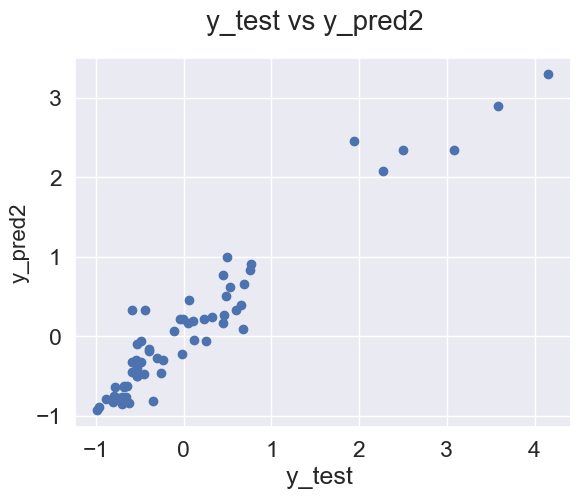

In [112]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred2)
fig.suptitle('y_test vs y_pred2', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred2', fontsize=16)    

### RMSE Score

In [113]:
r2_score(y_test, y_pred2)

0.915385372286651

###### The R2 score of Training set is 0.918 and Test set is 0.915 which is quite close.
###### Hence, We can say that our model is good enough to predict the Car prices using below predictor variables
- horsepower
- carwidth	
- Cars_Category_TopNotch_Cars
- carbody_hatchback
- enginetype_dohcv
- carbody_sedan                  
- carbody_wagon                  

#### Equation of Line to predict the Car prices values

$ Carprice = 0.2440 +  0.3599  \times  horsepower  + 0.3652  \times  carwidth +  1.2895 \times Carscategorytopnotchcars  - 0.4859 \times carbodyhatchback  - 1.4450 \times enginetypedohcv - 0.3518 \times carbodysedan - 0.4023 \times carbodywagon $

#### Model II Conclusions:
- R-sqaured and Adjusted R-squared - 0.918 and 0.915 - 90% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 215.9 and 4.70e-70(approx. 0.0) - Model fit is significant and explained 90%<br> variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

### Closing Statement:
- Both the models are good enough to predict the carprices which explains the variance of data upto 90% and the model is significant.